In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statistics as st
import math

In [3]:
data_path = 'Leak_45_2.csv'

df = pd.read_csv(data_path)

print("THIS IS THE FIRST 5 ROWS OF THE DATA\n", df.head())

print("THE NUMBER OF RECORDS ARE : ", len(df))

print("THE",len(df.columns) ,"COLUMNS OF THE DATA ARE : \n", '\n'.join(df.columns))

THIS IS THE FIRST 5 ROWS OF THE DATA
    Seconds        Timestamp_IST  S1-PT-1001A  10-PI-1110  S1-TT-1001A  \
0        0  2025-08-06 12:00:00    81.505802   94.003750    25.468191   
1        5  2025-08-06 12:00:05    81.542218   94.125647    25.473248   
2       10  2025-08-06 12:00:10    81.456420   93.984092    25.468731   
3       15  2025-08-06 12:00:15    81.519203   94.016449    25.443925   
4       20  2025-08-06 12:00:20    81.564585   94.054088    25.450339   

   10-TI-1103  S2-PT-1002A  S2-TT-1002A  20-PT-1312  S2-PT-1002B  ...  \
0   24.980068    16.105907    27.331827    4.999762    16.101426  ...   
1   25.005382    16.112124    27.340110    5.000480    16.112557  ...   
2   25.010398    16.120175    27.326326    5.002000    16.107052  ...   
3   25.023827    16.100479    27.338937    5.004135    16.101681  ...   
4   24.998950    16.094370    27.349509    4.999571    16.102429  ...   

   MOV_3018  11-PT-1203.1  TT-1201B.1  MOV_1206  MOV_3019  S1-PT-1001B.1  \
0       

In [4]:
df.describe()

,Seconds,S1-PT-1001A,10-PI-1110,S1-TT-1001A,10-TI-1103,S2-PT-1002A,S2-TT-1002A,20-PT-1312,S2-PT-1002B,20-TE,...,MOV_3018,11-PT-1203.1,TT-1201B.1,MOV_1206,MOV_3019,S1-PT-1001B.1,S1-TT-1001B.1,S2-PT-1002B.1,S2-TT-1002B.1,20-MOV-1304
count,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,...,8641.0,8641.000000,8641.000000,8641.0,8641.0,8641.000000,8641.000000,8641.000000,8641.000000,8641.0
mean,21600.000000,52.203214,64.812913,25.198925,25.000160,15.811634,27.306987,5.001702,15.811125,27.566810,...,1.0,47.303532,26.516168,1.0,1.0,52.201924,25.199069,15.811155,27.307312,1.0
std,12472.930857,15.747331,15.718337,0.354105,0.012923,0.223318,0.033888,0.002532,0.223239,0.030497,...,0.0,0.868509,0.029890,0.0,0.0,15.746459,0.354330,0.223412,0.034265,0.0
min,0.000000,41.873238,54.455265,24.420518,24.949192,15.610183,27.212630,4.991973,15.612502,27.468635,...,1.0,46.537468,26.440494,1.0,1.0,41.861803,24.422001,15.610080,27.213250,1.0
25%,10800.000000,41.977596,54.588112,24.934214,24.991413,15.638488,27.279371,4.999977,15.638040,27.542478,...,1.0,46.633674,26.494703,1.0,1.0,41.976226,24.935188,15.637852,27.279616,1.0
50%,21600.000000,42.021508,54.642413,25.439568,25.000063,15.647393,27.310443,5.001686,15.647002,27.572015,...,1.0,46.660548,26.510501,1.0,1.0,42.021116,25.439390,15.647012,27.310889,1.0
75%,32400.000000,62.820176,75.454285,25.458741,25.008643,16.102117,27.335391,5.003420,16.101578,27.591429,...,1.0,48.440492,26.532913,1.0,1.0,62.800176,25.459006,16.101885,27.335994,1.0
max,43200.000000,81.642599,94.198702,25.497392,25.055909,16.136388,27.387845,5.010613,16.133118,27.645469,...,1.0,48.547270,26.615598,1.0,1.0,81.633863,25.515912,16.133096,27.401256,1.0


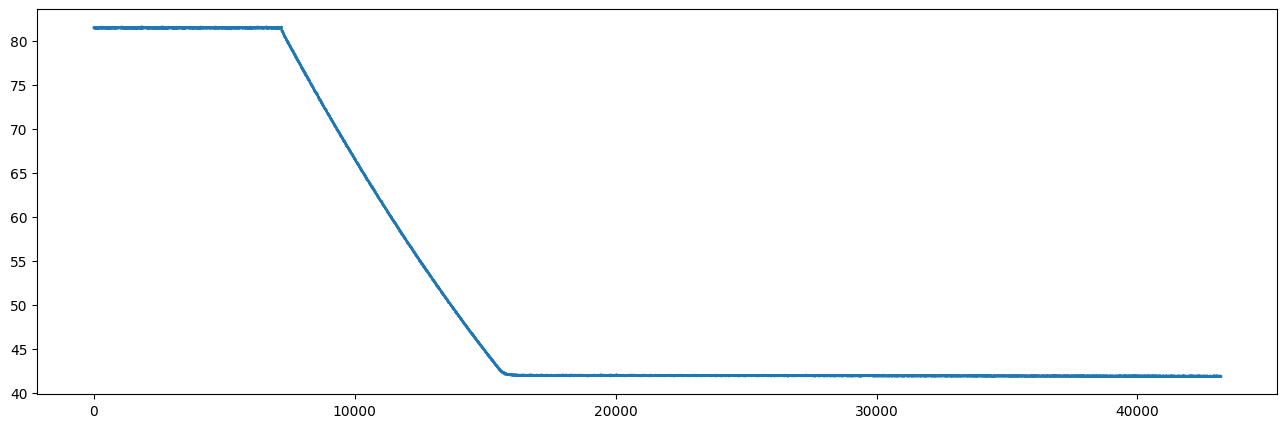

THE STANDARD DEVIATION OF THE PRESSURE TREND :  15.746419934283967
THE MEAN OF THE PRESSURE TREND IS  : 52.20321359332819
THE MIN, MAX DIFF OF THE PRESSURE TREND IS : 39.769360417622


In [5]:
trend = 'S1-PT-1001A'

y = df[trend]
x = df['Seconds']
c = np.random.random(len(df))

plt.figure(figsize=(16, 5))
plt.scatter(x, y, c)

plt.show()

print("THE STANDARD DEVIATION OF THE PRESSURE TREND : ", np.std(y))

print(f"THE MEAN OF THE PRESSURE TREND IS  : {np.mean(y)}")

print(f"THE MIN, MAX DIFF OF THE PRESSURE TREND IS : {-min(y) + max(y)}")

### ROLLING TRENDS

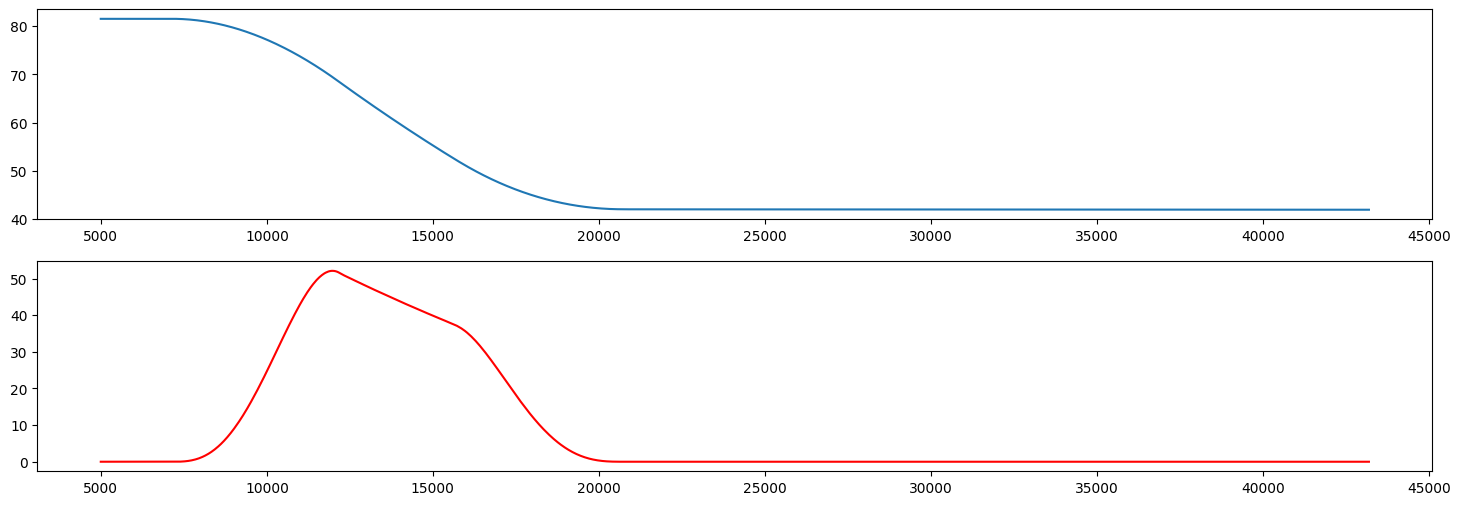

In [6]:
y_mean = df[trend].rolling(window= 1000).mean()
y_var = df[trend].rolling(window= 1000).var()
x = df['Seconds']

fig, ax = plt.subplots(2, 1, figsize=(18,6)) # 2 row, 1 cols
ax[0].plot(x, y_mean)
ax[1].plot(x, y_var, color = 'red')


### ROC

Text(0, 0, 'MEAN ROC : -0.000916335834')

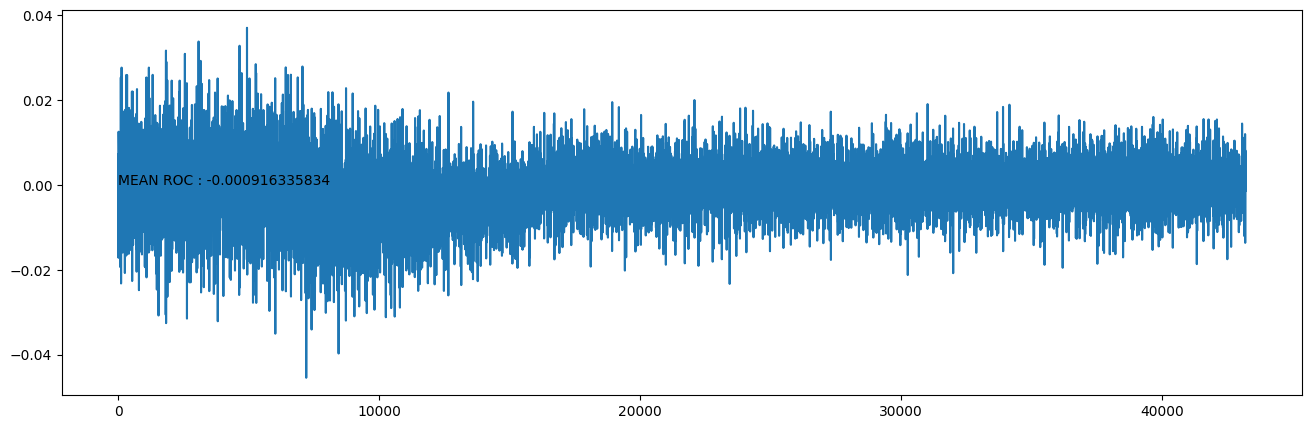

In [7]:
roc = np.diff(y)/5
time = x[1:]

plt.figure(figsize=(16, 5))
plt.plot(time, roc)

plt.text(0, 0, f"MEAN ROC : {np.mean(roc):.12f}")

Text(0.5, 1.0, 'MOVING ROC TREND OVER PRESSURE WITH A WINDOW OF 100')

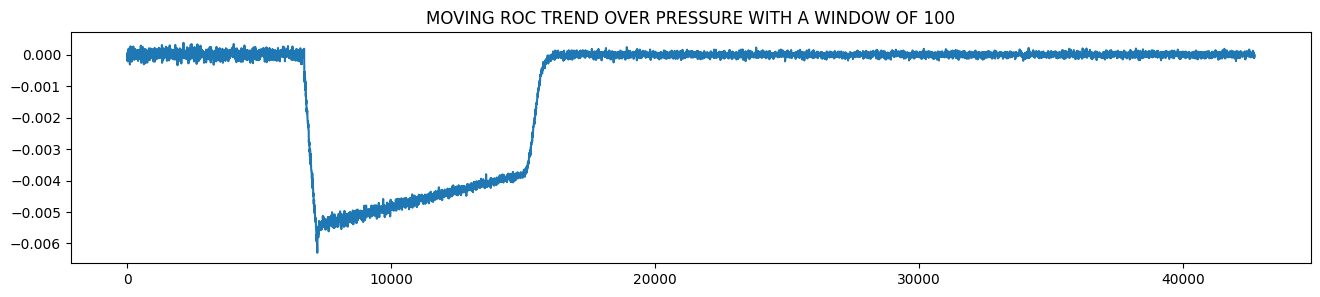

In [8]:
# mv roc
window_size = 100

mv_roc = []
time = []
i = 0
while i + window_size < len(y):
    mv_roc.append(roc[i : i + window_size].mean())
    time.append((i + 1) * 5 )
    i = i + 1

plt.figure(figsize=(16, 3))
plt.plot(time, mv_roc)
plt.title(f"MOVING ROC TREND OVER PRESSURE WITH A WINDOW OF {window_size}")

### BOX PLOT and OUTLIER

In [9]:
y = np.array(y) 

Q1 = np.percentile(y, 25)  
Q3 = np.percentile(y, 75)  
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = y[(y < lower_bound) | (y > upper_bound)]
print("Outliers:", outliers)

Outliers: []


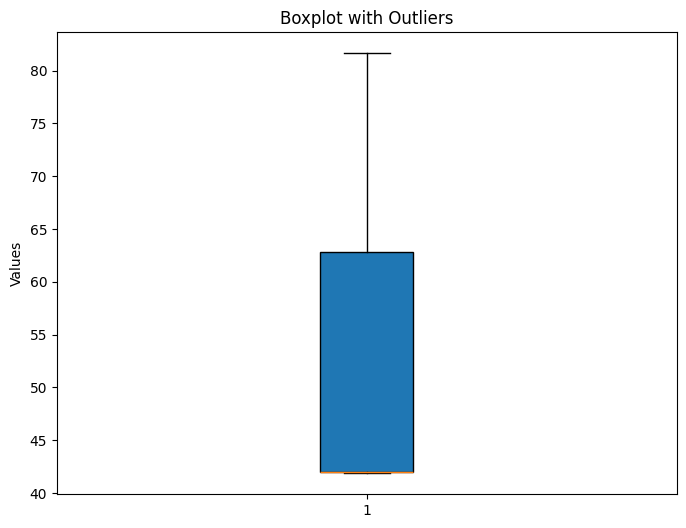

In [10]:
plt.figure(figsize=(8, 6))
plt.boxplot(y, vert=True, patch_artist=True, flierprops=dict(marker='o', color='red', markersize=8))
plt.title("Boxplot with Outliers")
plt.ylabel("Values")
plt.show()


In [11]:
df_1 = pd.read_csv(r'G:\GlitchDetect\csv_leaks\Leak at 45 km\4% Leak\202508061200GMT5x30.csv')

In [12]:
df_1.describe()

,Seconds,S1-PT-1001A,10-PI-1110,S1-TT-1001A,10-TI-1103,S2-PT-1002A,S2-TT-1002A,20-PT-1312,S2-PT-1002B,20-TE,...,MOV_3018,11-PT-1203.1,TT-1201B.1,MOV_1206,MOV_3019,S1-PT-1001B.1,S1-TT-1001B.1,S2-PT-1002B.1,S2-TT-1002B.1,20-MOV-1304
count,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,...,8641.0,8641.000000,8641.000000,8641.0,8641.0,8641.000000,8641.000000,8641.000000,8641.000000,8641.0
mean,21600.000000,48.709515,61.329296,25.187079,24.999933,15.285209,27.239733,5.001707,15.284864,27.510451,...,1.0,45.251121,26.420708,1.0,1.0,48.708619,25.187398,15.284615,27.239762,1.0
std,12472.930857,15.975630,15.950198,0.420387,0.012822,0.477747,0.078459,0.002523,0.477857,0.072478,...,0.0,1.855928,0.049015,0.0,0.0,15.975919,0.420478,0.477740,0.078690,0.0
min,0.000000,40.062196,52.661813,24.350191,24.947953,14.970345,27.074771,4.989854,14.972868,27.337872,...,1.0,44.072738,26.337988,1.0,1.0,40.053589,24.348695,14.970691,27.084668,1.0
25%,10800.000000,40.156991,52.771291,24.882469,24.991155,15.000064,27.171036,5.000022,14.999533,27.445296,...,1.0,44.150580,26.385988,1.0,1.0,40.155937,24.880271,14.999359,27.169986,1.0
50%,21600.000000,40.196717,52.818296,25.447363,24.999695,15.006944,27.237505,5.001689,15.006412,27.515995,...,1.0,44.170397,26.399412,1.0,1.0,40.195340,25.447840,15.006253,27.238143,1.0
75%,32400.000000,41.326296,54.079614,25.461541,25.008552,16.006063,27.319008,5.003420,16.010477,27.580904,...,1.0,47.410884,26.464688,1.0,1.0,41.318535,25.461435,16.001893,27.319611,1.0
max,43200.000000,81.659679,94.168480,25.512571,25.053088,16.138077,27.389384,5.010418,16.136098,27.640417,...,1.0,48.525209,26.548407,1.0,1.0,81.649381,25.515898,16.131355,27.391071,1.0


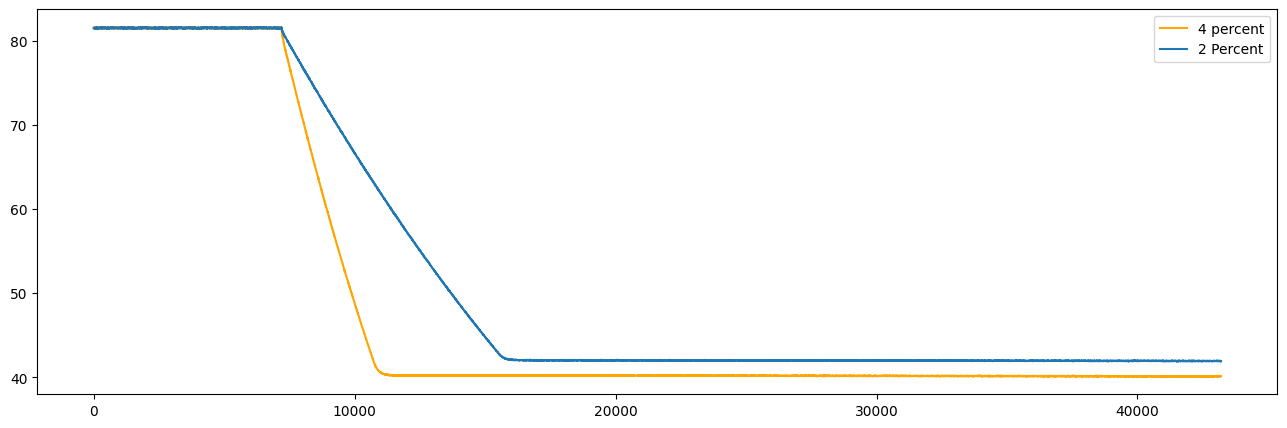

In [13]:
from turtle import color


y_1 = df_1[trend]
x = df_1['Seconds']

plt.figure(figsize=(16, 5))
plt.plot(x, y_1, color= 'orange', label= '4 percent')
plt.plot(x, y, label = '2 Percent')
plt.legend()


In [20]:
df_eff = df.drop(columns= ['Seconds', 'Timestamp_IST', 'VJA_MS', 'VJA_HSD', 'VJA_SKO', '10-MOV1118', '20-MOV-1301', 'S1-MOV-1001', 'S2-MOV-1002', 'CP4', 'CP5','11-MV1201-STS', 'CP7', 'CP8', '20-MOV-1303', '10-MOV1117', '10-MOV1103', 'MOV_3018', 'MOV_1206', 'MOV_3019', '20-MOV-1304'])
 
 

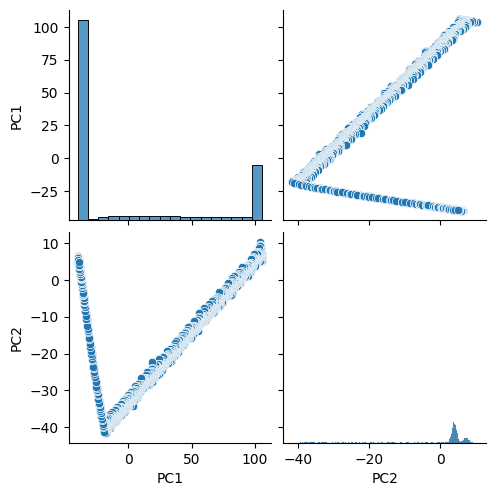

In [23]:


from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_eff)

#plot pca components pairplot on graph
    
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
sns.pairplot(pca_df)

In [ ]:
#fit an LSTM to the df_eff so that i can tell apart anomalies based on autoencoding
